**APPLICATION OF PREDICTING THE SALES:**

We can tell the company what are all the challenges they may face

What are the brands or products which is sold the most & other such kind of things

This helps sales team to understand which product to sell & which product to promote & other such kind of things

They can also make several marketing plans(let's say that a particular product in a particular store is getting sold the most & we may find some insights from it - as of why this product is getting sold the most & this helps the company to make better marketing decisions)
**bold text**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**About the dataset:**

BigMart Sales Prediction practice problem

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix


In [ ]:
bigmart_data = pd.read_csv('/content/drive/MyDrive/8th semester/CSE422/archive (1)/Train.csv')
bigmart_data.head(7)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


**Data** **Analysis**

In [ ]:
bigmart_data.keys()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
bigmart_data.shape

(8523, 12)

In [ ]:
#checking for duplicated rows
bigmart_data.duplicated().sum()

#No duplicate detected

0

In [ ]:
bigmart_data.isnull().sum()
#number of null values in a column

#There are some null values and we need to handle them using statistical method

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
print((bigmart_data.isnull().sum()*100)/ len(bigmart_data))

#checking the percentage of missing value

#The range of null values are between 17 to 28%

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


**Lets handle the missing value**

In [ ]:
#see in case of iteam weight which has numeric value
mean = bigmart_data['Item_Weight'].mean()
median = bigmart_data['Item_Weight'].median()
print(f'''Mean: {mean}
Median: {median}''')

Mean: 12.857645184135976
Median: 12.6


**These are close but which one should we actually use ?**


We need to see the variance. it will show us how much spread are our data before and after the imputation. if the variance is low, it means the spread is low and that is good. Remember, in regression we are trying to find the pattern and the less spread the data is, the better our model is. Therfore, we need less variance.

To check this, we need to temporarily create two columns. one of mean and the other median.

In [ ]:
bigmart_data['Item_Weight_mean']=bigmart_data['Item_Weight'].fillna(mean)
bigmart_data['Item_Weight_median']=bigmart_data['Item_Weight'].fillna(median)

In [ ]:
#we created two new colums
bigmart_data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300000,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920000,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500000,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200000,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930000,8.930
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,10.395000,10.395
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,13.650000,13.650
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.857645,12.600
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,16.200000,16.200
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,19.200000,19.200


In [ ]:
print('original iteam weight:', bigmart_data['Item_Weight'].var())
print('iteam weight after mean imputation',bigmart_data['Item_Weight_mean'].var())
print('iteam weight after median imputation',bigmart_data['Item_Weight_median'].var())

original iteam weight: 21.561688259836558
iteam weight after mean imputation 17.86012173506058
iteam weight after median imputation 17.869561454073647


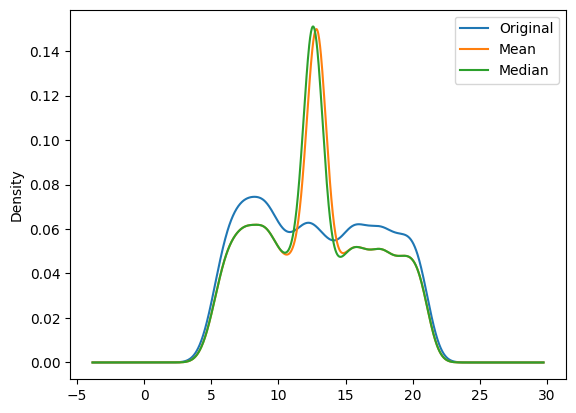

In [ ]:
#As both variances are similar let us now visualize them

bigmart_data['Item_Weight'].plot(kind = "kde",label="Original")

bigmart_data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

bigmart_data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

Remenber that our mean and median value was 17.somthing? and they were missing? So by imputation we can see that the density(more number of value) is in 17 and is different than the original data. its not desired. we can solve this using interpolation method but we wont be doing this today as our project template mentions only the mean and median. So we will chose any one of them. Lets take the mean.

In [ ]:
#Let us fill the null values using mean
bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mean(), inplace = True)

In [ ]:
#let us drop the additional columns that we have created
bigmart_data.drop(['Item_Weight_mean','Item_Weight_median' ], axis = 1, inplace = True)

In [ ]:
bigmart_data.isnull().sum()
#There are no more missing values in the Item_Weight column

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
bigmart_data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
bigmart_data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [ ]:
print(bigmart_data['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


In [ ]:
#Now let us handle the categorical values with mode
mode = bigmart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
missing_values=bigmart_data['Outlet_Size'].isnull()

In [ ]:
bigmart_data.loc[missing_values, 'Outlet_Size'] = bigmart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode[x])

In [ ]:
bigmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Label Endcoding:**

Here we are representing the textual values with numerical values so that our computer can read those. But first let us visualize the categorical data by using countplot.

**Problems with label encoding:**

In this method we represent the textual values with 0, 1, 2 and so on but sometimes an order or hiearchy is created which is not desired.

In [ ]:
categorical_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Establishment_Year', 'Item_Type', 'Outlet_Type']

for cols in categorical_columns:
  print(bigmart_data[cols].value_counts())
  print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Type


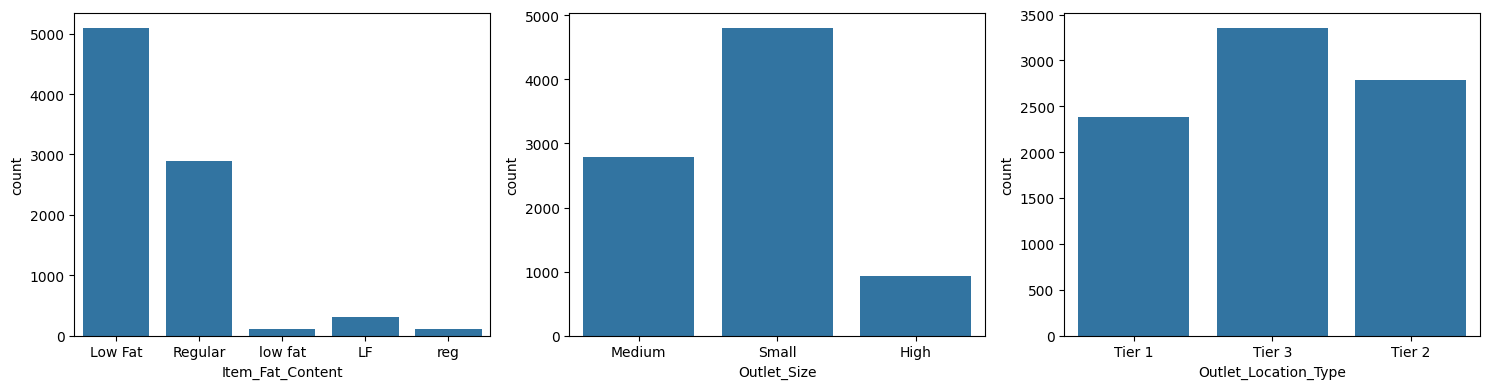

In [ ]:
categorical_columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

plt.figure(figsize=(15, 4))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=bigmart_data)


plt.tight_layout()
plt.show()

Here these are the different values of our categorical columns And below are the same type but long and more column. so I have showed them separately, no other reasons

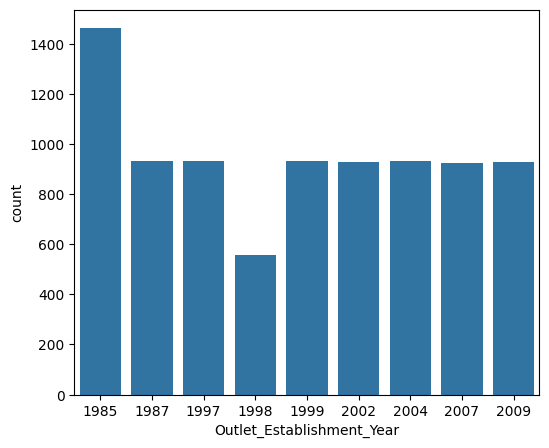

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Outlet_Establishment_Year', data=bigmart_data)
plt.show()

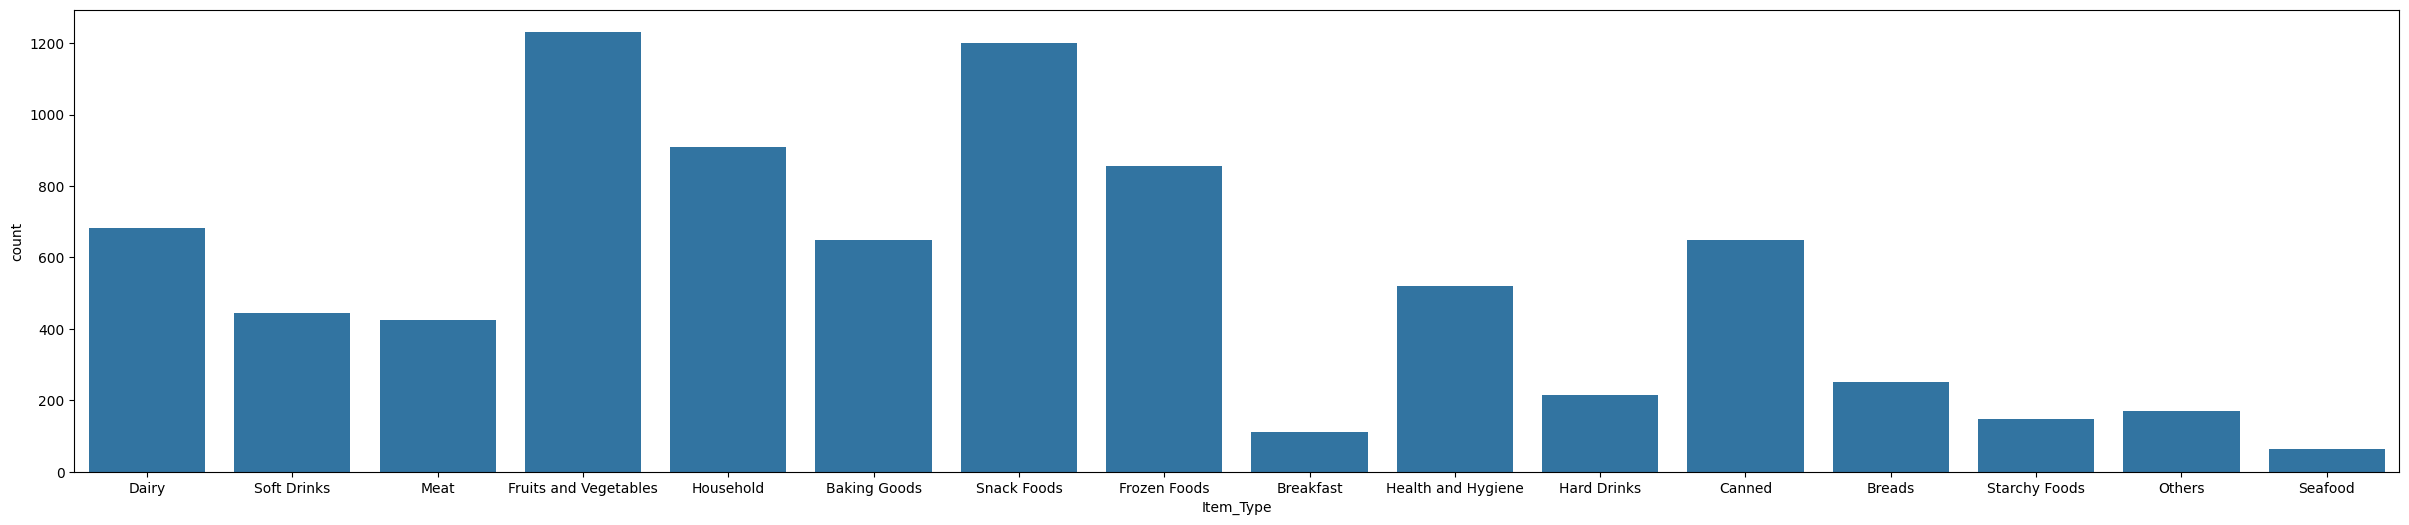

In [ ]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=bigmart_data)
plt.show()

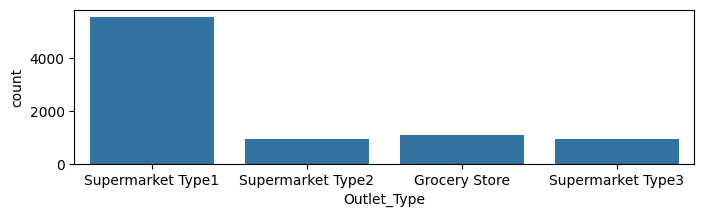

In [ ]:
plt.figure(figsize=(8,2))
sns.countplot(x='Outlet_Type', data=bigmart_data)
plt.show()

In [ ]:
#Let us see how many values are there
bigmart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
#We need to replace and merge some columns with different names but has same meanings
bigmart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
bigmart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
# Now let us begin the part of label encoding
encoder=LabelEncoder()

In [ ]:
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

encoder = LabelEncoder()

for col in categorical_columns:
    bigmart_data[col] = encoder.fit_transform(bigmart_data[col])

In [ ]:
bigmart_data.head()
#Now there are no columns with categorical values.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
# Why should we do feature scaling? The values of Item_MRP column shrink down into a much smaller range after scaling them
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP'] #, 'Total_Items', 'Avg_Sales_Per_Item

scaler = StandardScaler()
bigmart_data[numerical_columns] = scaler.fit_transform(bigmart_data[numerical_columns])


In [ ]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.841872,0,-0.970732,4,1.747454,9,1999,1,0,1,3735.1380
1,8,-1.641706,1,-0.908111,14,-1.489023,3,2009,1,2,2,443.4228
2,662,1.098554,0,-0.956917,10,0.010040,9,1999,1,0,1,2097.2700
3,1121,1.500838,1,-1.281758,6,0.660050,0,1998,2,2,0,732.3800
4,1297,-0.929428,0,-1.281758,9,-1.399220,1,1987,0,2,1,994.7052


<Axes: >

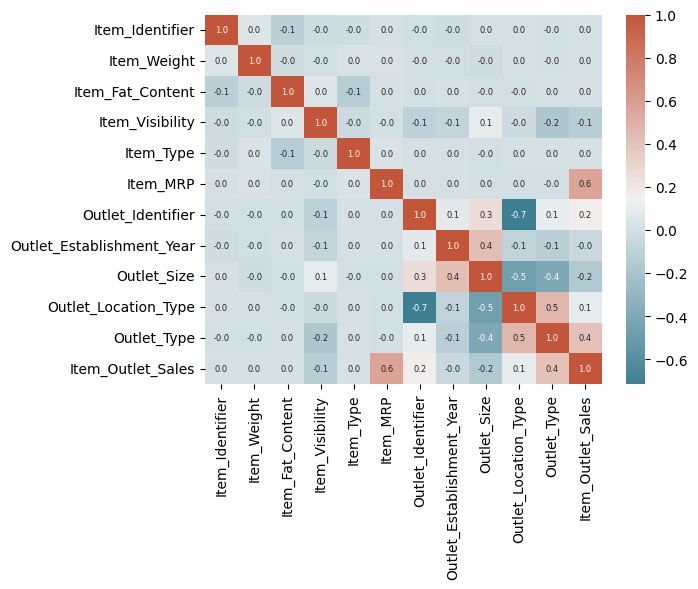

In [ ]:
bigmart_data_corr = bigmart_data.corr()
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(bigmart_data_corr, cmap=cmap, fmt='0.1f', annot=True, annot_kws={'size': 6})

In [ ]:
x= bigmart_data.drop('Item_Outlet_Sales',axis = 1)
y= bigmart_data['Item_Outlet_Sales']

In [ ]:
#splitting into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape,y.shape,y_train.shape,y_test.shape)

(8523, 11) (5966, 11) (2557, 11) (8523,) (5966,) (2557,)


RandomForestRegressor - R-squared: 0.5712, RMSE: 1151.4126, MAE :  800.0418, MSE:  1325751.0008
LinearRegression - R-squared: 0.5098, RMSE: 1231.1664, MAE :  921.9588, MSE:  1515770.6659
Lasso - R-squared: 0.5097, RMSE: 1231.2281, MAE :  921.9743, MSE:  1515922.5713
XGBRegressor - R-squared: 0.5241, RMSE: 1213.0555, MAE :  849.4839, MSE:  1471503.6416


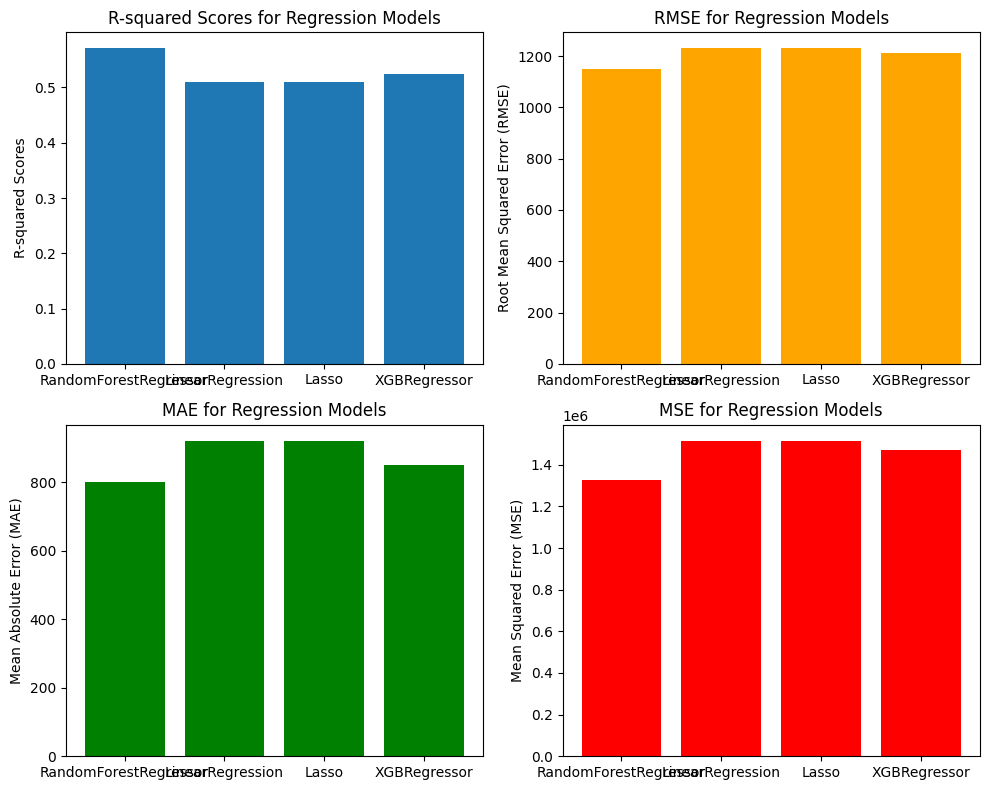

In [ ]:
models=[RandomForestRegressor(),LinearRegression(),Lasso(),XGBRegressor()]
Models = ["RandomForestRegressor", "LinearRegression", "Lasso", "XGBRegressor"]
score_of_r2 = []
score_rmse = []
Scores_MAE = []
Scores_MSE = []


for i in models:
    i.fit(x_train,y_train)
    y_prediction = i.predict(x_test)

    r2 = r2_score(y_test,y_prediction)
    rmse = np.sqrt(mean_squared_error(y_test,y_prediction))
    mae = mean_absolute_error(y_test, y_prediction)
    mse = mean_squared_error(y_test, y_prediction)

    score_of_r2.append(r2)
    score_rmse.append(rmse)
    Scores_MAE.append(mae)
    Scores_MSE.append(mse)

    print(f"{type(i).__name__} - R-squared: {r2:.4f}, RMSE: {rmse:.4f}, MAE : {mae: .4f}, MSE: {mse: .4f}")

plt.figure(figsize=(10, 8))

# Bar chart for R-squared scores
plt.subplot(2, 2, 1)
plt.bar(Models, score_of_r2)
plt.ylabel('R-squared Scores')
plt.title('R-squared Scores for Regression Models')

# Bar chart for RMSE
plt.subplot(2, 2, 2)
plt.bar(Models, score_rmse, color='orange')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE for Regression Models')

# Subplot for MAE
plt.subplot(2, 2, 3)
plt.bar(Models, Scores_MAE, color='green')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Regression Models')

# Subplot for MSE
plt.subplot(2, 2, 4)
plt.bar(Models, Scores_MSE, color='red')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Regression Models')

plt.tight_layout()
plt.show()





